Configure home directory and YOLO install

In [1]:
%reset -f
import os
HOME = os.getcwd()
print(HOME)

# Import YOLO
!yolo checks
from ultralytics import YOLO
# from PIL import Image
# from IPython import display
# from IPython.display import Image, display

from PIL import Image

# Import CV2
import cv2

import time

/home/tyche/ForeHelm/YOLO_inference
Ultralytics 8.3.33 🚀 Python-3.11.2 torch-2.5.1 CPU (Cortex-A76)
Setup complete ✅ (4 CPUs, 7.9 GB RAM, 20.7/58.0 GB disk)

OS                  Linux-6.6.51+rpt-rpi-2712-aarch64-with-glibc2.36
Environment         Linux
Python              3.11.2
Install             git
RAM                 7.86 GB
Disk                20.7/58.0 GB
CPU                 Cortex-A76
CPU count           4
GPU                 None
GPU count           None
CUDA                None

numpy               ✅ 2.1.3>=1.23.0
matplotlib          ✅ 3.9.2>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 11.0.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.14.1>=1.4.1
torch               ✅ 2.5.1>=1.8.0
torchvision         ✅ 0.20.1>=0.9.0
tqdm                ✅ 4.67.0>=4.64.0
psutil              ✅ 6.1.0
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.2.3>=1.1.4
seaborn             ✅ 0.13.2>=0.11.0
ultralytics-thop

In [2]:

# Load a YOLO11n PyTorch model
model = YOLO("yolo11n.pt")

# Export the model to NCNN format
model.export(format="ncnn")  # creates 'yolo11n_ncnn_model'
ncnn_model = YOLO("yolo11n_ncnn_model")

Ultralytics 8.3.33 🚀 Python-3.11.2 torch-2.5.1 CPU (Cortex-A76)


YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

TorchScript: starting export with torch 2.5.1...
TorchScript: export success ✅ 4.9s, saved as 'yolo11n.torchscript' (10.5 MB)

NCNN: starting export with NCNN 1.0.20240820...
NCNN: running '/home/tyche/ForeHelm/.venv/lib/python3.11/site-packages/ultralytics/pnnx yolo11n.torchscript ncnnparam=yolo11n_ncnn_model/model.ncnn.param ncnnbin=yolo11n_ncnn_model/model.ncnn.bin ncnnpy=yolo11n_ncnn_model/model_ncnn.py pnnxparam=yolo11n_ncnn_model/model.pnnx.param pnnxbin=yolo11n_ncnn_model/model.pnnx.bin pnnxpy=yolo11n_ncnn_model/model_pnnx.py pnnxonnx=yolo11n_ncnn_model/model.pnnx.onnx fp16=0 device=cpu inputshape="[1, 3, 640, 640]"'


pnnxparam = yolo11n_ncnn_model/model.pnnx.param
pnnxbin = yolo11n_ncnn_model/model.pnnx.bin
pnnxpy = yolo11n_ncnn_model/model_pnnx.py
pnnxonnx = yolo11n_ncnn_model/model.pnnx.onnx
ncnnparam = yolo11n_ncnn_model/model.ncnn.param
ncnnbin = yolo11n_ncnn_model/model.ncnn.bin
ncnnpy = yolo11n_ncnn_model/model_ncnn.py
fp16 = 0
optlevel = 2
device = cpu
inputshape = [1,3,640,640]f32
inputshape2 = 
customop = 
moduleop = 
############# pass_level0
inline module = torch.nn.modules.linear.Identity
inline module = ultralytics.nn.modules.block.Attention
inline module = ultralytics.nn.modules.block.Bottleneck
inline module = ultralytics.nn.modules.block.C2PSA
inline module = ultralytics.nn.modules.block.C3k
inline module = ultralytics.nn.modules.block.C3k2
inline module = ultralytics.nn.modules.block.DFL
inline module = ultralytics.nn.modules.block.PSABlock
inline module = ultralytics.nn.modules.block.SPPF
inline module = ultralytics.nn.modules.conv.Concat
inline module = ultralytics.nn.modules.con

NCNN: export success ✅ 2.9s, saved as 'yolo11n_ncnn_model' (10.2 MB)

Export complete (9.2s)
Results saved to /home/tyche/ForeHelm/YOLO_inference
Predict:         yolo predict task=detect model=yolo11n_ncnn_model imgsz=640  
Validate:        yolo val task=detect model=yolo11n_ncnn_model imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading yolo11n_ncnn_model for NCNN inference...

0: 640x640 1 bed, 106.4ms
Speed: 6.0ms preprocess, 106.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
106.4145565032959


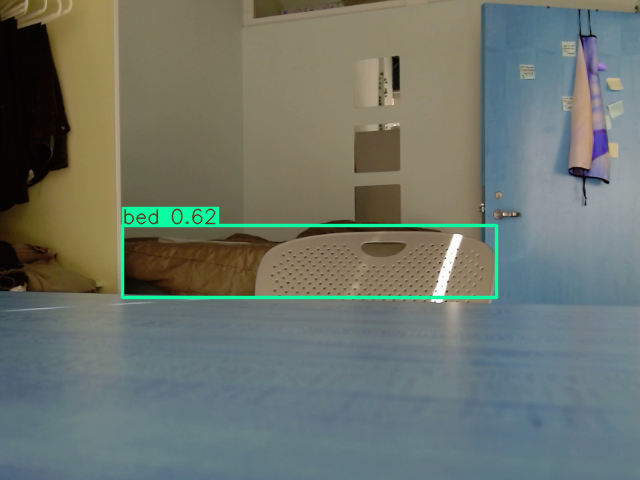

In [ ]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 640)
cap.set(cv2.CAP_PROP_FPS, 30)

status, photo = cap.read()
# photo = cv2.convertScaleAbs(photo, alpha=1.3, beta=30)  # Increase brightness
cap.release()
photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)

# !yolo task=detect mode=predict model=yolov11n.pt conf=0.25 source='img/captured_image.jpg' project='runs'
# Load a pretrained YOLOv11 model

model = YOLO('yolo11n_ncnn_model')  # Choose the appropriate model variant
results = model.predict(source=photo, save=False, conf=0.6)
print(results[0].speed["inference"])
Image.fromarray(results[0].plot())


